
<h1>Spotify - проект по Введению в DS</h1> 



![Sample Image](Spotify.png)

<h2>Предварительные настройки</h2>

*Импорт необходимых библиотек*


In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.neural_network import MLPRegressor
from sklearn.metrics import mean_squared_error, r2_score

*Загрузка набора данных*

In [2]:
data_path = 'dataset.csv'
spotify_data = pd.read_csv(data_path)

*Первые строки набора данных*

In [3]:
spotify_data.head()

Unnamed: 0                track_id                 artists  \
0           0  5SuOikwiRyPMVoIQDJUgSV             Gen Hoshino   
1           1  4qPNDBW1i3p13qLCt0Ki3A            Ben Woodward   
2           2  1iJBSr7s7jYXzM8EGcbK5b  Ingrid Michaelson;ZAYN   
3           3  6lfxq3CG4xtTiEg7opyCyx            Kina Grannis   
4           4  5vjLSffimiIP26QG5WcN2K        Chord Overstreet   

                                          album_name  \
0                                             Comedy   
1                                   Ghost (Acoustic)   
2                                     To Begin Again   
3  Crazy Rich Asians (Original Motion Picture Sou...   
4                                            Hold On   

                   track_name  popularity  duration_ms  explicit  \
0                      Comedy          73       230666     False   
1            Ghost - Acoustic          55       149610     False   
2              To Begin Again          57       210826     False   
3  Can't Help Falling In Love          71       201933     False   
4                     Hold On          82       198853     False   

   danceability  energy  ...  loudness  mode  speechiness  acousticness  \
0         0.676  0.4610  ...    -6.746     0       0.1430        0.0322   
1         0.420  0.1660  ...   -17.235     1       0.0763        0.9240   
2         0.438  0.3590  ...    -9.734     1       0.0557        0.2100   
3         0.266  0.0596  ...   -18.515     1       0.0363        0.9050   
4         0.618  0.4430  ...    -9.681     1       0.0526        0.4690   

   instrumentalness  liveness  valence    tempo  time_signature  track_genre  
0          0.000001    0.3580    0.715   87.917               4     acoustic  
1          0.000006    0.1010    0.267   77.489               4     acoustic  
2          0.000000    0.1170    0.120   76.332               4     acoustic  
3          0.000071    0.1320    0.143  181.740               3     acoustic  
4          0.000000    0.0829    0.167  119.949               4     acoustic  

[5 rows x 21 columns]

*Проверка на пропущенные значения и базовую статистику*

In [4]:
print(spotify_data.info())
print(spotify_data.describe())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 114000 entries, 0 to 113999
Data columns (total 21 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   Unnamed: 0        114000 non-null  int64  
 1   track_id          114000 non-null  object 
 2   artists           113999 non-null  object 
 3   album_name        113999 non-null  object 
 4   track_name        113999 non-null  object 
 5   popularity        114000 non-null  int64  
 6   duration_ms       114000 non-null  int64  
 7   explicit          114000 non-null  bool   
 8   danceability      114000 non-null  float64
 9   energy            114000 non-null  float64
 10  key               114000 non-null  int64  
 11  loudness          114000 non-null  float64
 12  mode              114000 non-null  int64  
 13  speechiness       114000 non-null  float64
 14  acousticness      114000 non-null  float64
 15  instrumentalness  114000 non-null  float64
 16  liveness          11

<h2>Этап EDA (разведочный анализ данных)</h2>

<h3>Анализ, связанный с популярностью треков</h3>

<h4>График "Зависимость популярности от танцевальности" показывает, коррелирует ли танцевальность с популярностью песен.</h4>

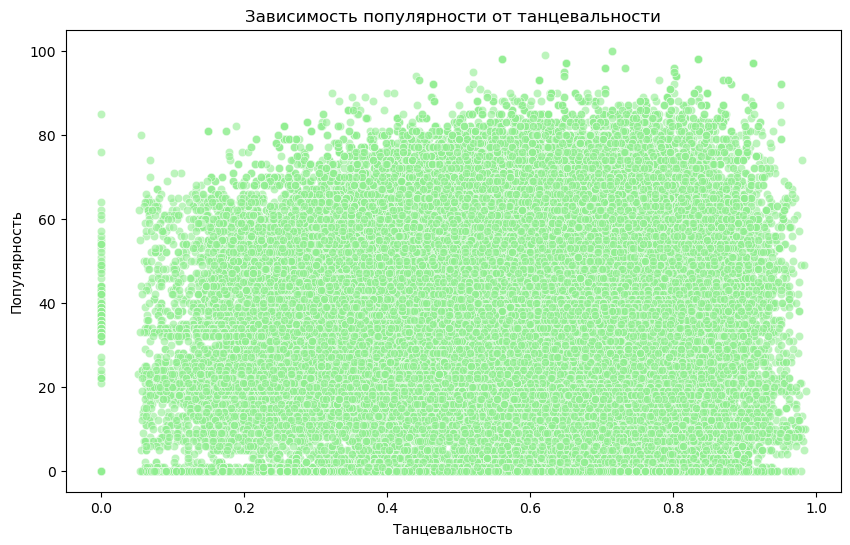

In [5]:
plt.figure(figsize=(10, 6))
sns.scatterplot(x='danceability', y='popularity', data=spotify_data, alpha=0.6, color='lightgreen')
plt.title('Зависимость популярности от танцевальности')
plt.xlabel('Танцевальность')
plt.ylabel('Популярность')
plt.show()

**Вывод:** Из данного графика можно найти диапазоны танцевальности трека, в которых он будет наиболее популярным. Исследовав данный график, можно понять, что лучший диапазон танцевальности для трека - это от 0.4 до 0.8, ведь именно в этом диапазоне больше всего точек популярности в диапазоне от 80 до 100.

<h4>График "Зависимость популярности от энергичности" показывает, как уровень энергичности треков связан с их популярностью.</h4>

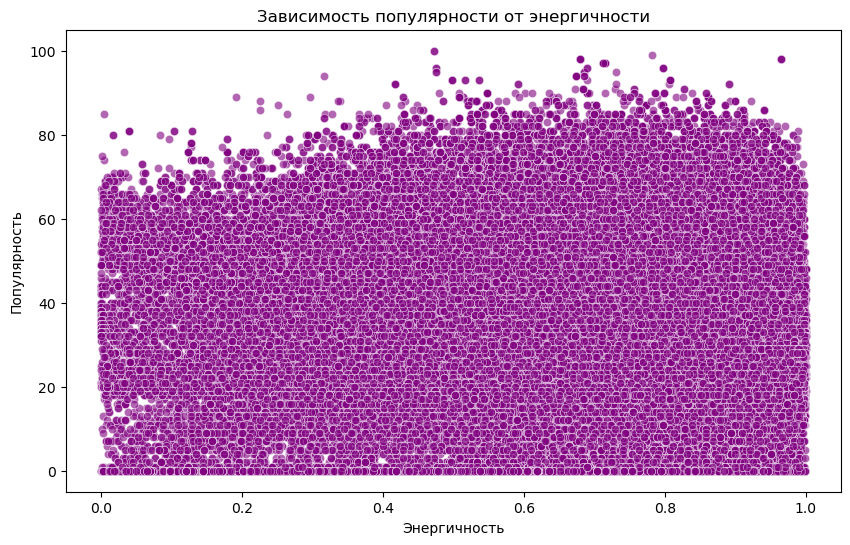

In [6]:
plt.figure(figsize=(10, 6))
sns.scatterplot(x='energy', y='popularity', data=spotify_data, alpha=0.6, color='purple')
plt.title('Зависимость популярности от энергичности')
plt.xlabel('Энергичность')
plt.ylabel('Популярность')
plt.show()

**Вывод:** Из данного графика можно найти диапазоны энергичности трека, в которых он будет наиболее популярным. Исследовав данный график, можно понять, что лучший диапазон энергичности для трека - это от 0.4 до 0.9.

<h4>График "Популярность в зависимости от танцевальности и энергичности музыки" демонстрирует взаимосвязь между танцевальностью, энергичностью и популярностью треков. </h4>

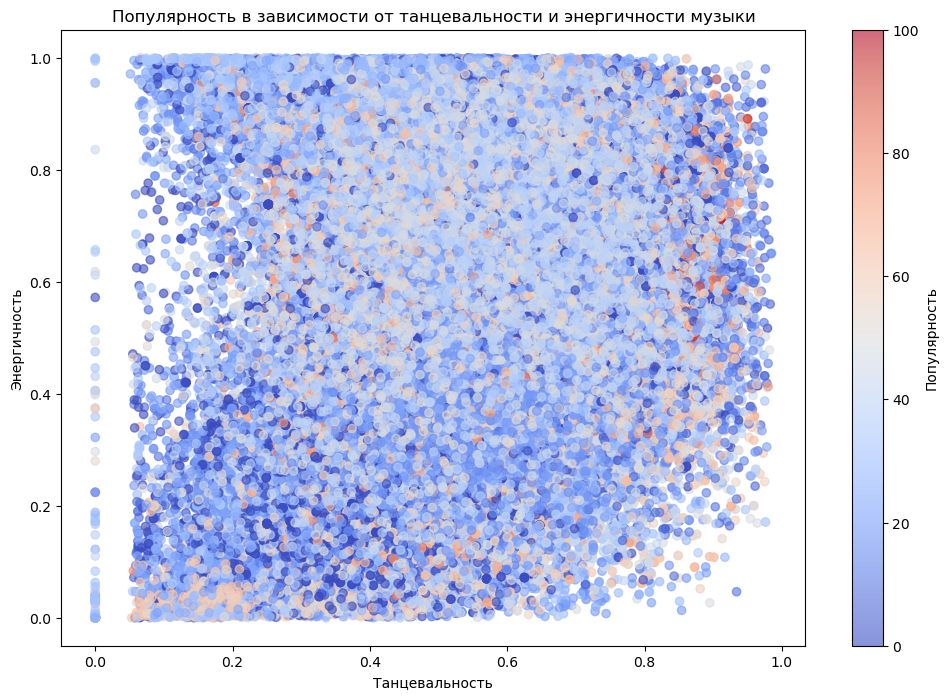

In [7]:
plt.figure(figsize=(12, 8))
scatter = plt.scatter(
    spotify_data['danceability'], 
    spotify_data['energy'], 
    c=spotify_data['popularity'], cmap='coolwarm', alpha=0.6
)
plt.colorbar(scatter, label='Популярность')
plt.title('Популярность в зависимости от танцевальности и энергичности музыки')
plt.xlabel('Танцевальность')
plt.ylabel('Энергичность')
plt.show()

**Вывод:**
    Данный график дает понять, какие сочетания танцевальности и энергичности характерны для популярных треков. Изходя из него видно, что в треке должна присутствоать как энергичность, так и танцевальность, чтобы с большей вероятность "стрельнуть", ведь больше всего красных точек, отвечающих за уровень популярности, находится именно на пересечении танцевальности (0.8-1) и энергичности (0.4-1).

<h4>График "Зависимость популярности от темпа" показывает, как количество ударов в минуту влияет на популярность трека.</h4>

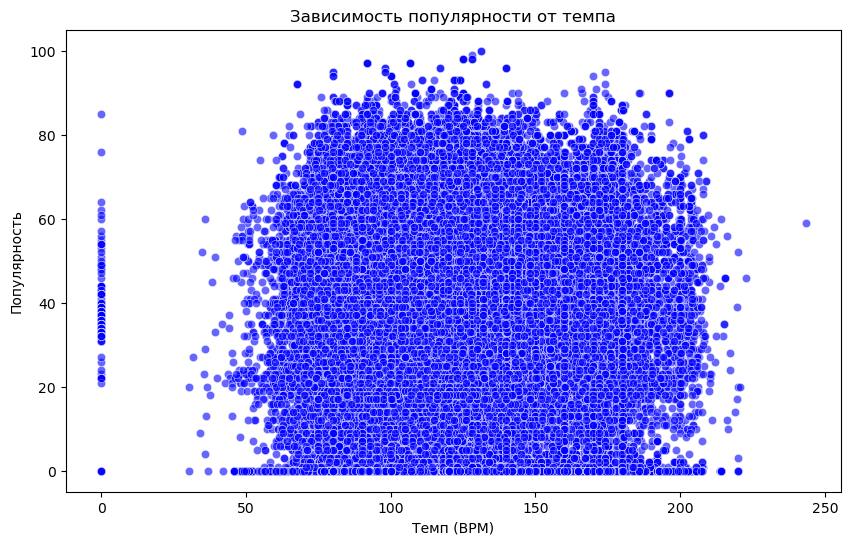

In [8]:
plt.figure(figsize=(10, 6))
sns.scatterplot(x='tempo', y='popularity', data=spotify_data, alpha=0.6, color='blue')
plt.title('Зависимость популярности от темпа')
plt.xlabel('Темп (BPM)')
plt.ylabel('Популярность')
plt.show()

**Вывод:** Исследуя данный график можно понять, есть ли оптимальный диапазон темпа, который предпочитает аудитория. Ну и следуя из этого графика - аудитория предпочитает темп в диапазоне от 75 до 175, ведь в этом диапазоне темпа достигается лучший результат популярности.

<h4>График "Популярность в зависимости от энергичности и эмоционального тона трека" отображает распределение песен по энергичности и эмоциональному тону.</h4>

*Комментарий:*
1. Ось X (valence) отражает эмоциональный тон песни, где 1 - позитивные, радостные эмоции, а значение 0 — нейтральные или мрачные эмоции.
2. Ось Y (energy) показывает уровень энергичности песни, где высокие значения указывают на более динамичные и энергичные композиции, а низкие — на спокойные.

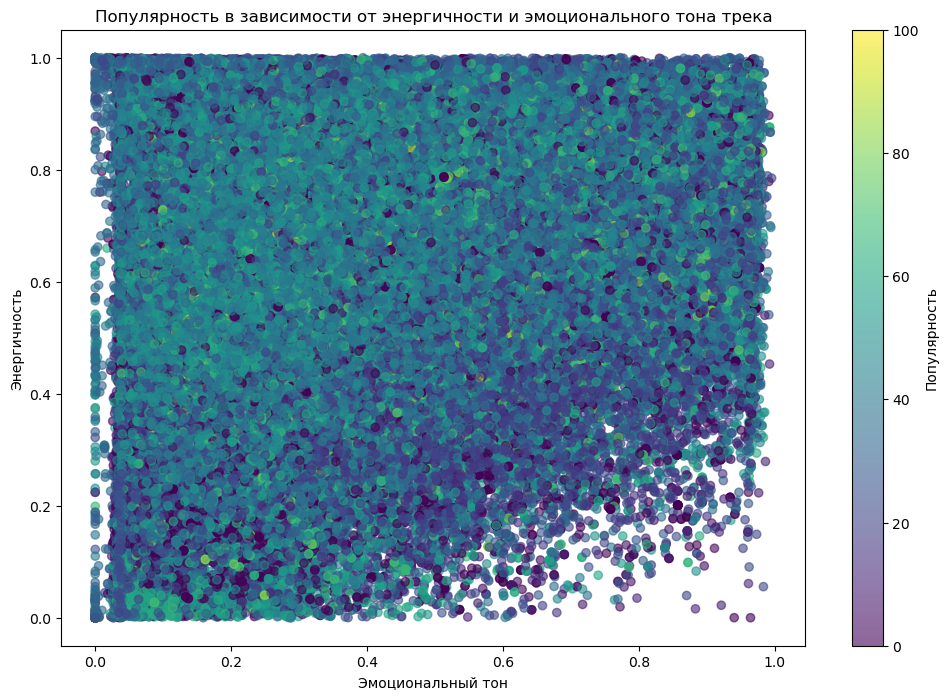

In [9]:
plt.figure(figsize=(12, 8))
scatter = plt.scatter(
    spotify_data['valence'], spotify_data['energy'], 
    c=spotify_data['popularity'], cmap='viridis', alpha=0.6
)
plt.colorbar(scatter, label='Популярность')
plt.title('Популярность в зависимости от энергичности и эмоционального тона трека')
plt.xlabel('Эмоциональный тон')
plt.ylabel('Энергичность')
plt.show()

**Вывод:** Из графика видно, что эмоциональный тон песни должен соответсвовать ее энергичности, ведь иначе слушателю трек понравится меньше. Это можно заметить на части графика, где эмоциональный тон близок к 1 (то есть использует положительные эмоции), а энергичность наоборот близка к нулю (то есть "счастливый" трек исполняется в более спокойной манере).

<h4>График "Зависимость популярности от громкости и акустичности трека" анализирует взаимосвязь между двумя громкостью в децибелах и акустичность, а также отображает популярность треков с помощью цветовой шкалы.</h4>

*Комментарий:*
1. Ось X (loudness) измеряет среднюю громкость трека (в децибелах). Более высокие значения указывают на громкие треки, низкие - на тихие.
2. Ось Y (acousticness) оценивает, насколько трек акустичен. Значения ближе к 1 соответствуют чисто акустическим композициям, ближе к 0 - электронным или синтетическим.

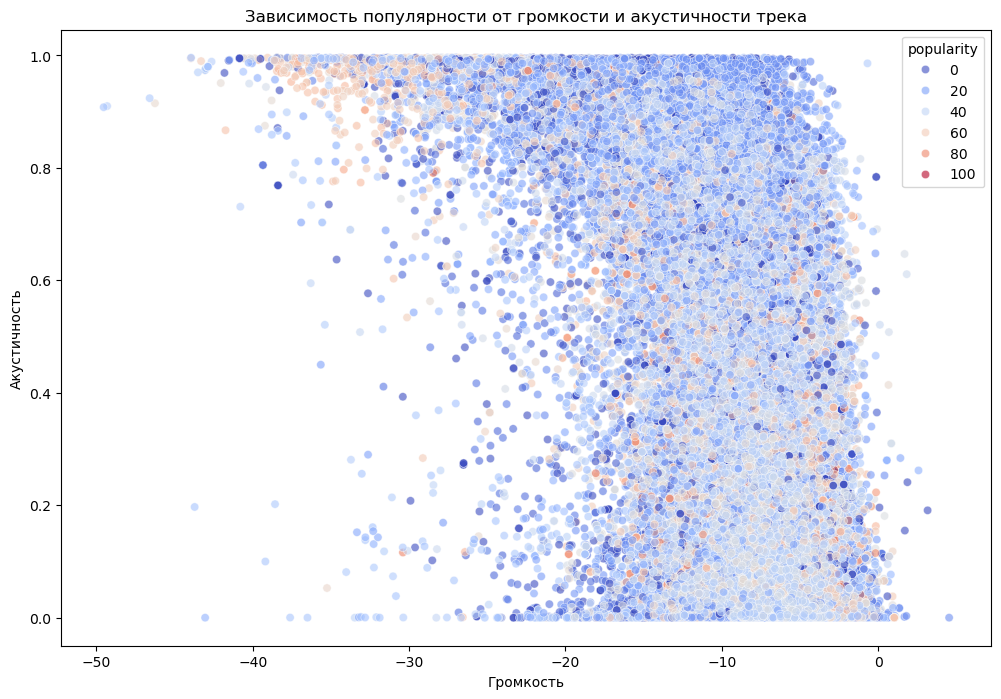

In [10]:
plt.figure(figsize=(12, 8))
sns.scatterplot(data=spotify_data, x='loudness', y='acousticness', hue='popularity', palette='coolwarm', alpha=0.6)
plt.title('Зависимость популярности от громкости и акустичности трека')
plt.xlabel('Громкость')
plt.ylabel('Акустичность')
plt.show()

**Вывод:** Исходя из графика можно заметить, что среднему слушателю более предпочтительны треки с более низкой громкостью и более аккустической окмпозицией.

<h3>Анализ, связанный с жанрами треков</h3>

<h4>График "Распределение продолжительности треков" показывает среднюю продолжительность треков различных жанров.</h4>

*UPD:*
Если честно, я немного не понимаю одного момента - данные о длительности трека в базе стоят в миллисекундах, я пытался как-то исправить их в минуты, но у меня не вышло, и теперь самый продолжительный трек длится чуть больше 5мс😓

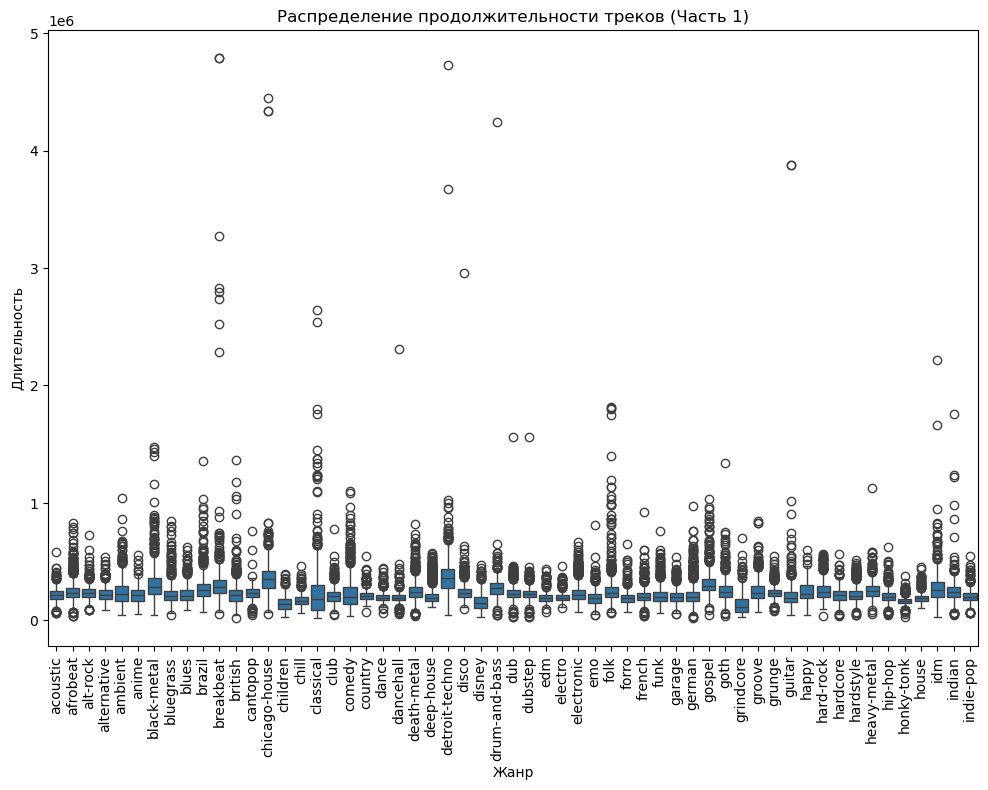

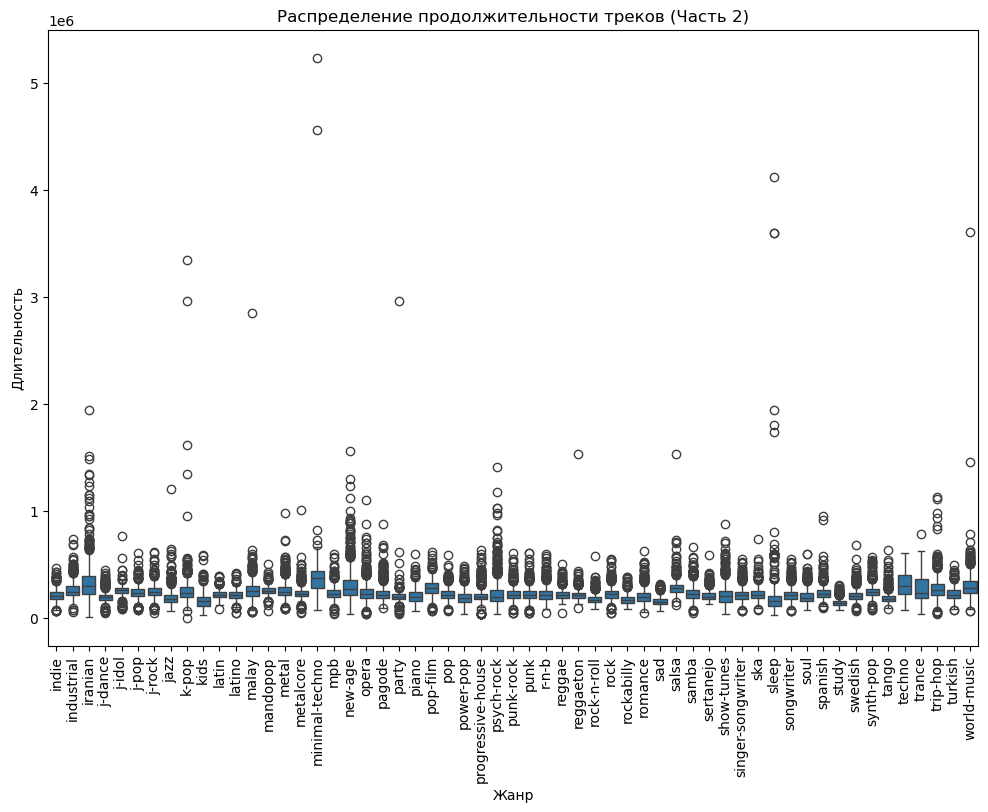

In [11]:
genres = spotify_data['track_genre'].unique()

half = len(genres) // 2  # Разделяем жанры пополам
genres_part1 = genres[:half]
genres_part2 = genres[half:]

plt.figure(figsize=(12, 8)) # Первая половина жанров
sns.boxplot(
    data=spotify_data[spotify_data['track_genre'].isin(genres_part1)], x='track_genre', y='duration_ms'
)
plt.title('Распределение продолжительности треков (Часть 1)')
plt.xlabel('Жанр')
plt.ylabel('Длительность')
plt.xticks(rotation=90)
plt.show()

plt.figure(figsize=(12, 8)) # Вторая половина жанров
sns.boxplot(
    data=spotify_data[spotify_data['track_genre'].isin(genres_part2)], x='track_genre', y='duration_ms'
)
plt.title('Распределение продолжительности треков (Часть 2)')
plt.xlabel('Жанр')
plt.ylabel('Длительность')
plt.xticks(rotation=90)
plt.show()

**Вывод:** По графику можно заметить, в каких жанрах чаще всего бывают длинные треки, например самый продолжительный трек принадлежит жанру minimal-techno.

<h4>График "Распределение танцевальности по жанрам" помогает заметить жанры с высокими или низкими значениями танцевальности.</h4>

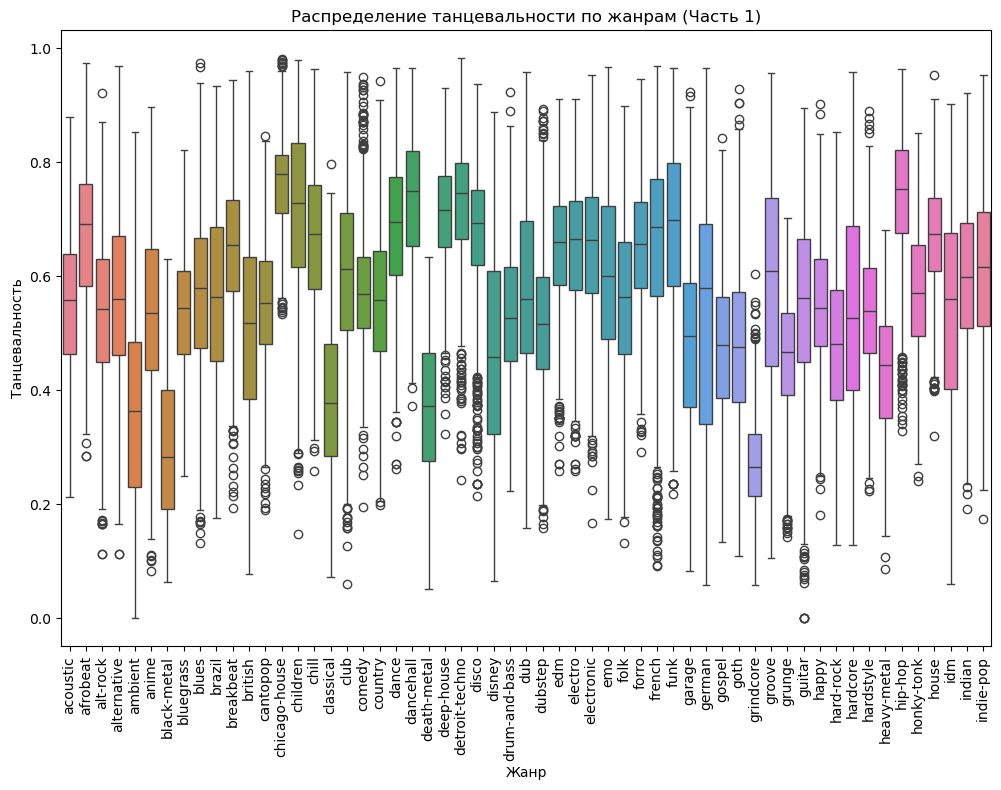

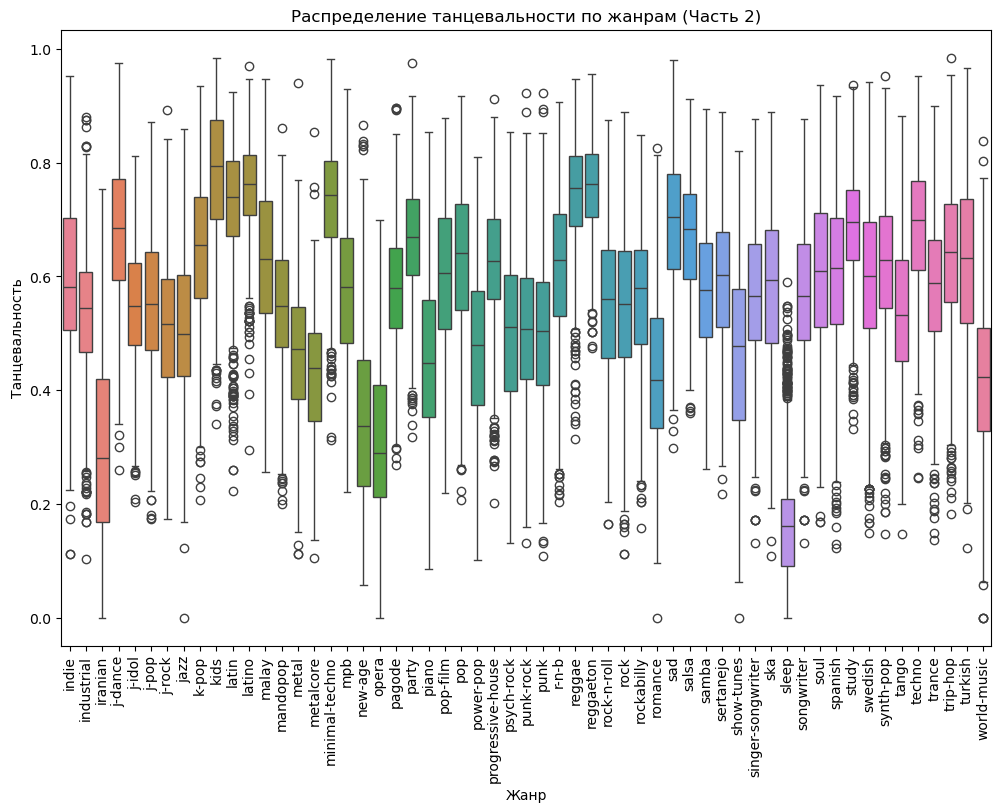

In [12]:
genres = spotify_data['track_genre'].unique()

half = len(genres) // 2 # Разделяем жанры пополам
genres_part1 = genres[:half]
genres_part2 = genres[half:]


plt.figure(figsize=(12, 8))# Первая половина жанров
sns.boxplot(
    data=spotify_data[spotify_data['track_genre'].isin(genres_part1)], x='track_genre', y='danceability', hue='track_genre', legend=False
)

plt.title('Распределение танцевальности по жанрам (Часть 1)')
plt.xlabel('Жанр')
plt.ylabel('Танцевальность')
plt.xticks(rotation=90)
plt.show()

plt.figure(figsize=(12, 8))# Вторая половина жанров
sns.boxplot(
    data=spotify_data[spotify_data['track_genre'].isin(genres_part2)], x='track_genre', y='danceability', hue='track_genre', legend=False
)


plt.title('Распределение танцевальности по жанрам (Часть 2)')
plt.xlabel('Жанр')
plt.ylabel('Танцевальность')
plt.xticks(rotation=90)
plt.show()

**Вывод:** Исходя из графика можно увидеть, что жанры поп-музыки имеют высокую танцевальность, тогда как у классической музыки значения ниже.

<h3>Анализ, связанный с артистами</h3>

<h4>В графике "Топ-10 артистов по количеству песен" можно увидеть, какие артисты представлены в наборе данных больше всех остальных.</h4>

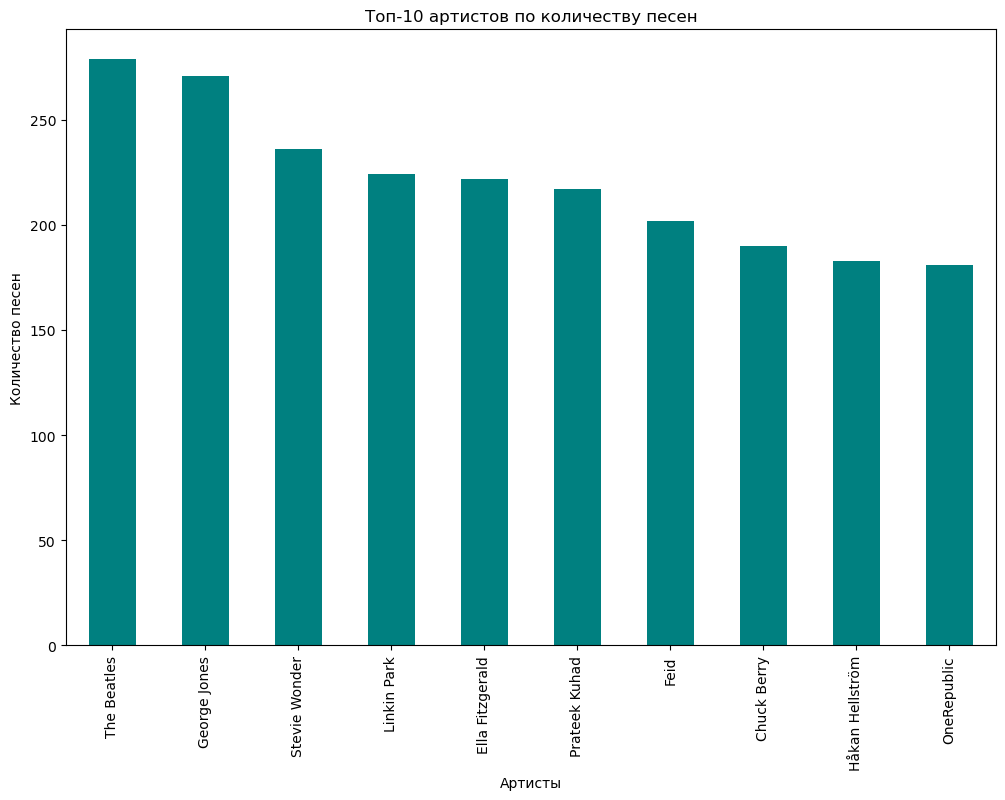

In [13]:
plt.figure(figsize=(12, 8))
spotify_data['artists'].value_counts().head(10).plot(kind='bar', color='teal')
plt.title('Топ-10 артистов по количеству песен')
plt.xlabel('Артисты')
plt.ylabel('Количество песен')
plt.show()

**Вывод:** Из графика видно, что группа *"The Beatles"* появляется чаще остальных, что может говорит об их популярности.

<h4>В графике "Средняя популярность песен у топ-10 артистов по количеству песен" представлен анализ популярности топ-10 артистов по количеству песен.</h4>

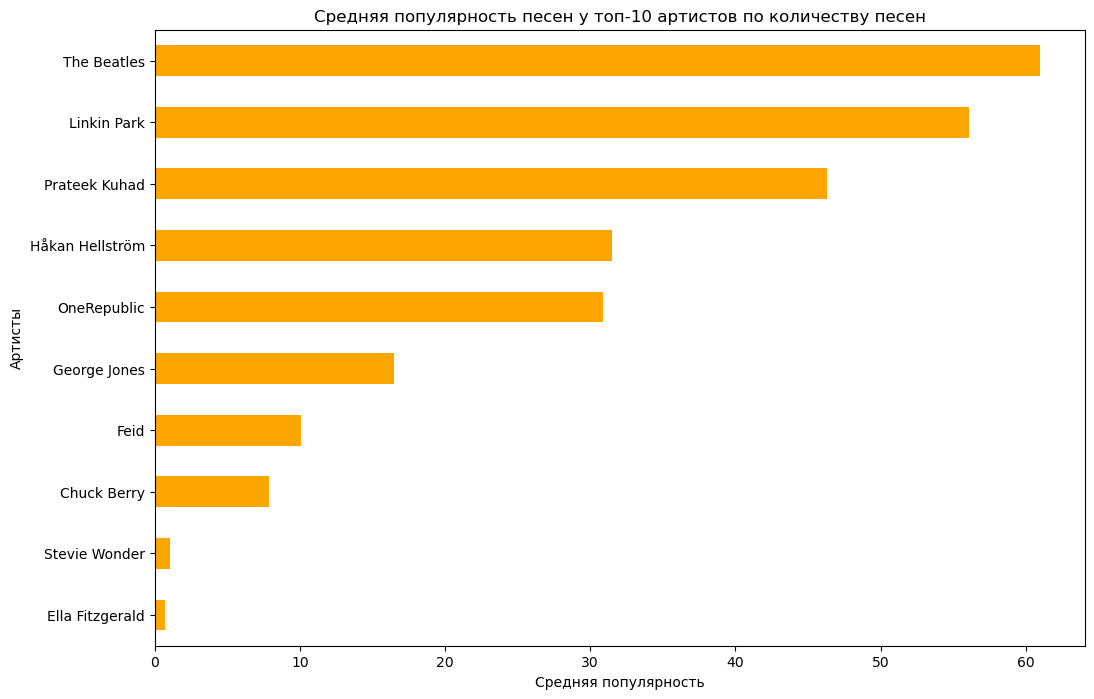

In [14]:
artist_popularity = spotify_data.groupby('artists')['popularity'].mean()
top_artists = spotify_data['artists'].value_counts().head(10).index
top_artist_popularity = artist_popularity[top_artists]

plt.figure(figsize=(12, 8))
top_artist_popularity.sort_values().plot(kind='barh', color='orange')
plt.title('Средняя популярность песен у топ-10 артистов по количеству песен')
plt.xlabel('Средняя популярность')
plt.ylabel('Артисты')
plt.show()

**Вывод:** используя данные из этого графика и графика **"Топ-10 артистов по количеству песен"** можно понять, что не все артисты, у кого много песен, имеют большую популярность. Например *George Jones* занимает второе место по количеству треков, но его средняя популярность не доходит даже до 20.

<h3>Корреляционный анализ</h3>

<h4>"Матрица корреляций" показывает, какие числовые характеристики связаны между собой.</h4>

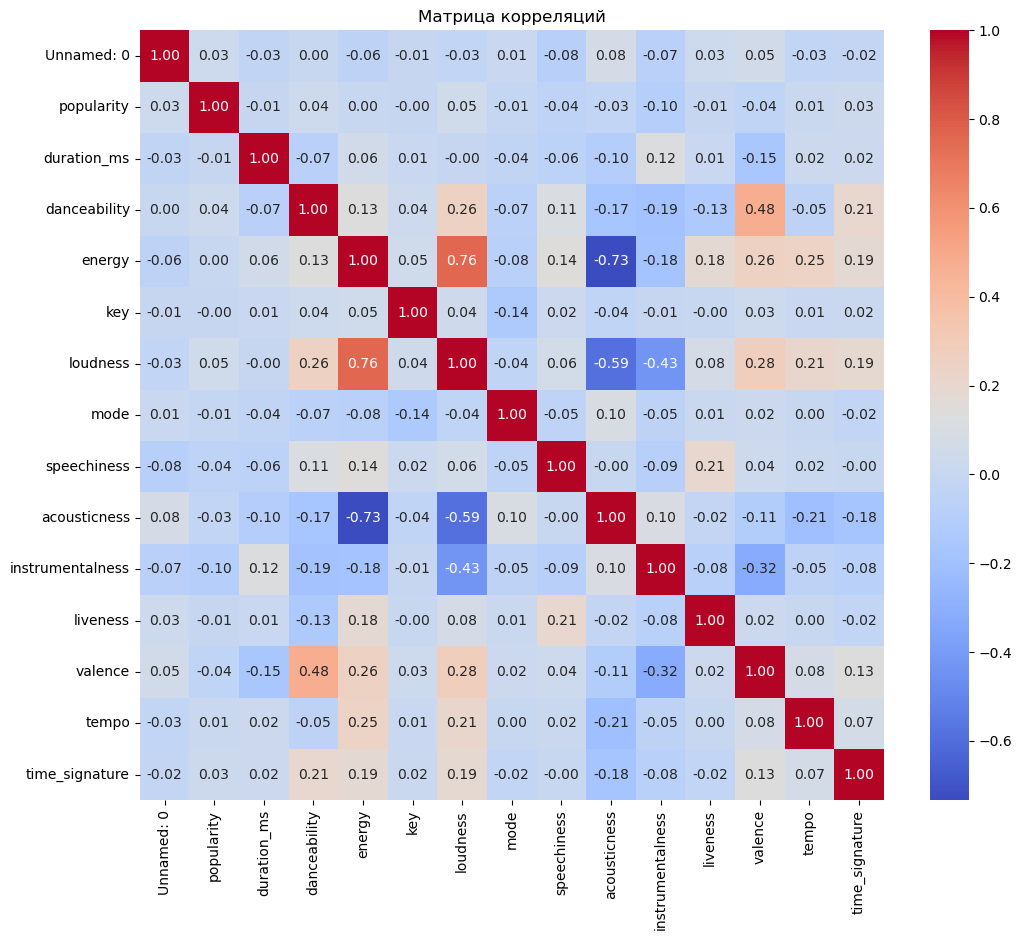

In [15]:
plt.figure(figsize=(12, 10))
numerical_data = spotify_data.select_dtypes(include=[np.number])
corr_matrix = numerical_data.corr()
sns.heatmap(corr_matrix, annot=True, fmt='.2f', cmap='coolwarm')
plt.title('Матрица корреляций')
plt.show()

**Вывод:**  По данной матрице можно сделать много интересных выводов, например: 
1. Положительная корреляция между energy и loudness указывает на то, что более энергичные треки, как правило, звучат громче.
2. Отрицательная корреляция между acousticness и energy указывает на то, что акустические треки обычно менее энергичны.

<h4>График "Корреляция между различными атрибутами треков" позволяет исследовать зависимости между следующими характеристиками треков: длительность, темп, громкость и популярность.</h4>

<Figure size 1000x800 with 0 Axes>

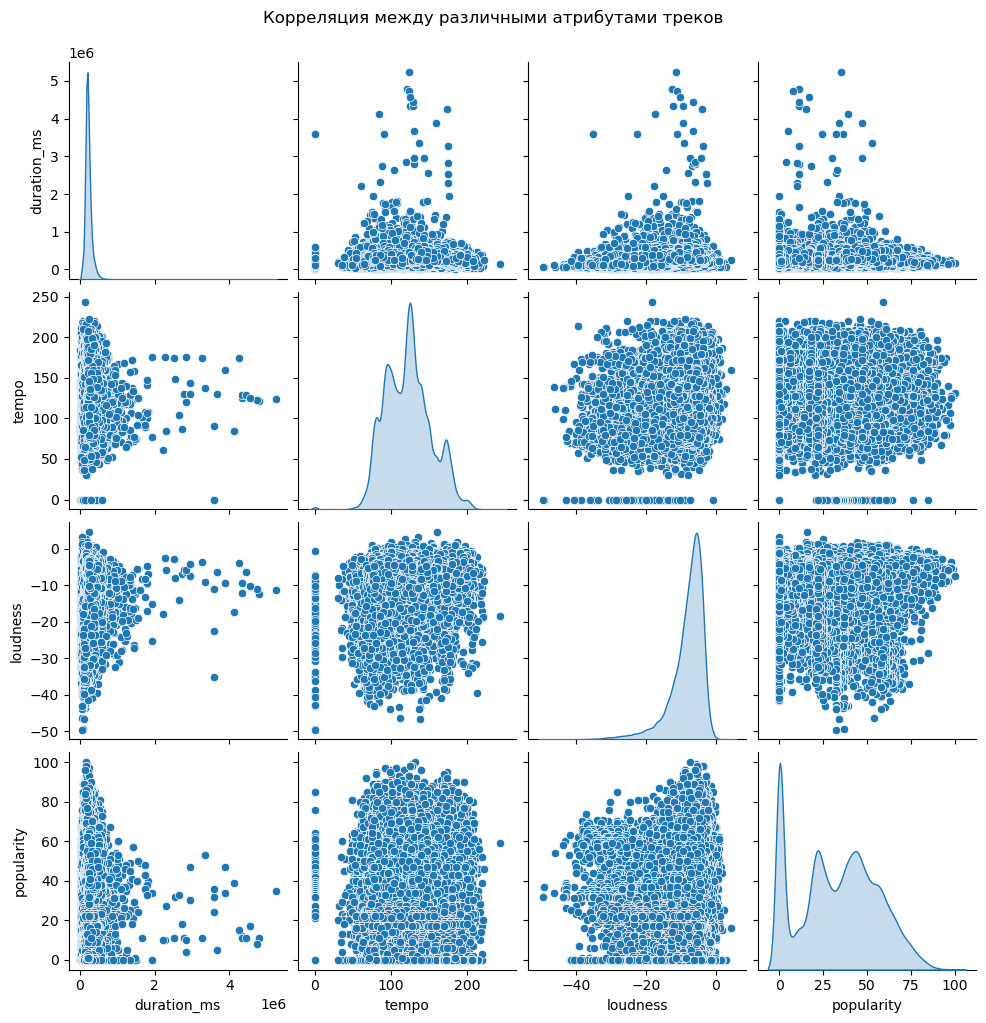

In [16]:
numerical_data = spotify_data.select_dtypes(include=[np.number])
plt.figure(figsize=(10, 8))
sns.pairplot(numerical_data, vars=['duration_ms', 'tempo', 'loudness', 'popularity'], diag_kind='kde')
plt.suptitle('Корреляция между различными атрибутами треков', y=1.02)
plt.show()

**Вывод:** По данному графику можно заметить много всего, ведь здесь представлены связи всех основных характеристик трека. Первое, что бросилось лично мне в глаза: 
1. Более популярными ставятся менее продолжительные треки.
2. Также более популярными ставятся более громкие треки. 

<h3>Анализ, связанный с тональстью, темпом и громкостью треков</h3>

<h4>График "Распределение ключевых тональностей" показывает в какой тольности сделано больше всего треков.</h4>

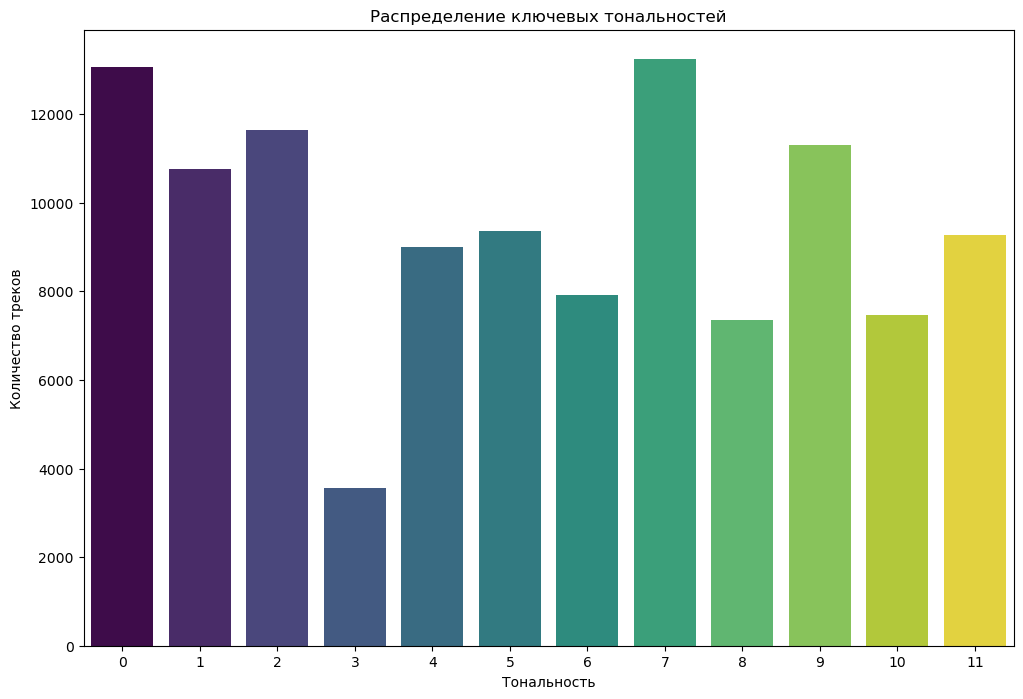

In [17]:
# Получение распределения ключевых тональностей
key_distribution = spotify_data['key'].value_counts().reset_index()
key_distribution.columns = ['key', 'count']

# Построение графика
plt.figure(figsize=(12, 8))
sns.barplot(data=key_distribution, x='key', y='count', hue='key', dodge=False, palette='viridis', legend=False)
plt.title('Распределение ключевых тональностей')
plt.xlabel('Тональность')
plt.ylabel('Количество треков')
plt.legend([], [], frameon=False)  # Убираем легенду
plt.show()


**Вывод:** Исходя из графика, можно сказать, что больше всего треков делают в 0 и 7 тональностях.


<h4>График "Зависимость темпа от громкости" показывает, как изменяется громкость треков в зависимости от их темпа.</h4>

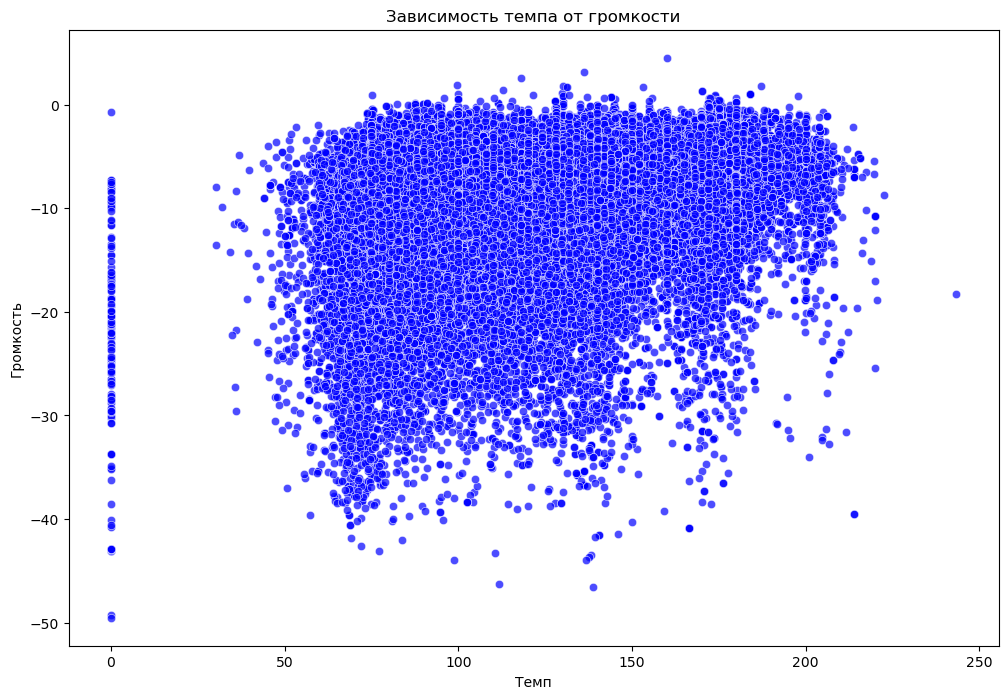

In [18]:
plt.figure(figsize=(12, 8))
sns.scatterplot(data=spotify_data, x='tempo', y='loudness', color='blue', alpha=0.7)
plt.title('Зависимость темпа от громкости')
plt.xlabel('Темп')
plt.ylabel('Громкость')
plt.show()

**Вывод:** Исходя из графика, мной не было выявлено какой-либо зависимости между громкостью и скоростью трека.

<h2>Feature Engineering</h2>

<h3>Создание новых признаков</h3>

Длина трека в минутах:

In [19]:
spotify_data['duration_min'] = spotify_data['duration_ms'] / 60000

Ритмичность: Соотношение tempo и duration_min:

In [20]:
spotify_data['rhythmicity'] = spotify_data['tempo'] / spotify_data['duration_min']

Соотношение громкости и энергичности:

In [21]:
spotify_data['loudness_energy_ratio'] = spotify_data['loudness'] / spotify_data['energy']

Бинарный признак: популярный или нет (если значение popularity выше 50, то считается популярным):

In [22]:
spotify_data['is_popular'] = (spotify_data['popularity'] > 50).astype(int)

<h3>Корреляция новых колонок с таргетом</h3>

Для анализа важности новых признаков используем корреляцию с целевой переменной (popularity).

popularity               1.000000
is_popular               0.734738
loudness                 0.050423
danceability             0.035448
Unnamed: 0               0.032142
time_signature           0.031073
tempo                    0.013205
energy                   0.001056
key                     -0.003853
loudness_energy_ratio   -0.004002
liveness                -0.005387
duration_ms             -0.007101
duration_min            -0.007101
mode                    -0.013931
acousticness            -0.025472
rhythmicity             -0.039119
valence                 -0.040534
speechiness             -0.044927
instrumentalness        -0.095139
Name: popularity, dtype: float64


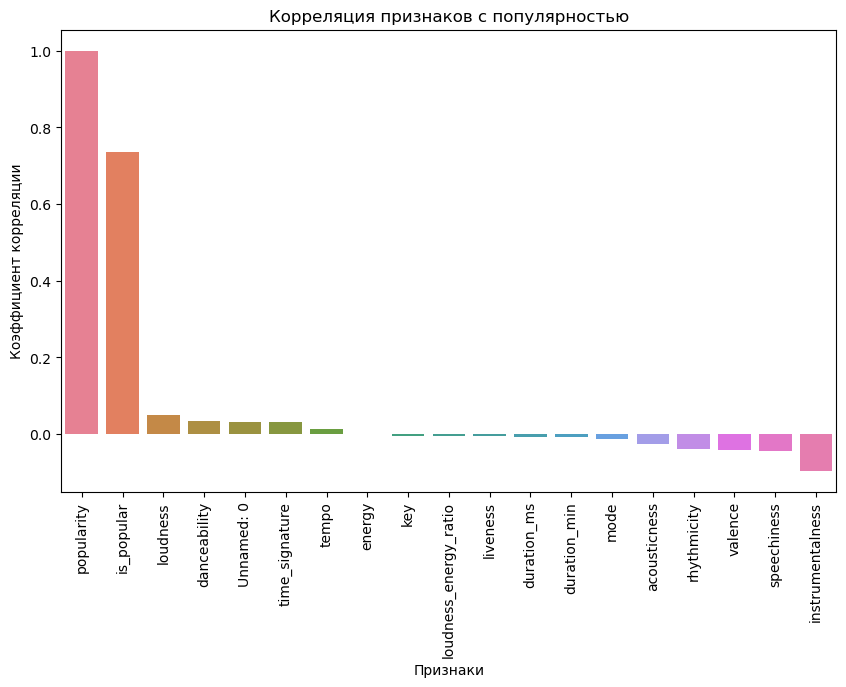

In [23]:
numerical_data = spotify_data.select_dtypes(include=[np.number])# Фильтруем только числовые данные

corr_matrix = numerical_data.corr()# Вычисляем корреляционную матрицу

target_corr = corr_matrix['popularity'].sort_values(ascending=False)# Сортируем корреляции по таргету
print(target_corr)

plt.figure(figsize=(10, 6))# Визуализация корреляции признаков с популярностью
sns.barplot(
    x=target_corr.index, 
    y=target_corr.values, 
    hue=target_corr.index,  
    dodge=False,  
    legend=False  
)
plt.title('Корреляция признаков с популярностью')
plt.xlabel('Признаки')
plt.ylabel('Коэффициент корреляции')
plt.xticks(rotation=90)
plt.show()



<h3>Feature Importances</h3>

Импорт нужных библиотек:

In [30]:
from sklearn.linear_model import LogisticRegression
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

Исключение целевой переменной из признаков:

In [31]:
X = spotify_data.drop(['track_id', 'artists', 'album_name', 'track_name', 'track_genre'], axis=1)
y = spotify_data['popularity']

Проверка и обработка данных

In [32]:
X.replace([np.inf, -np.inf], np.nan, inplace=True)
X.fillna(0, inplace=True)

Разделение на обучающую и тестовую выборки:

In [33]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

Тренировка модели логической регрессии для оценки важности:

In [37]:
logreg_model = LogisticRegression(max_iter=1000, random_state=42)
logreg_model.fit(X_train, y_train)
print("Модель успешно обучена.")

Модель успешно обучена.


C:\Users\Honor\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


Получение важности признаков (коэффициенты модели):

In [38]:
feature_importances = abs(logreg_model.coef_[0])

Создание DataFrame для удобного отображения:

In [39]:
feature_names = X.columns
importance_df = pd.DataFrame({
    'Feature': feature_names,
    'Importance': feature_importances
})

Сортировка по важности признаков:

In [40]:
importance_df = importance_df.sort_values(by='Importance', ascending=False)

Визуализация важности признаков:

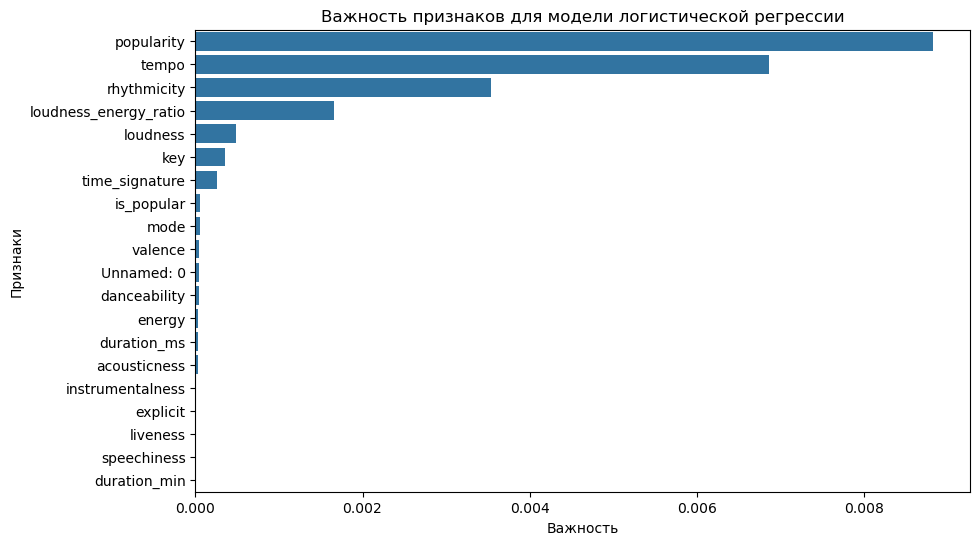

In [41]:
plt.figure(figsize=(10, 6))
sns.barplot(x='Importance', y='Feature', data=importance_df)  # Убрали параметр palette
plt.title('Важность признаков для модели логистической регрессии')
plt.xlabel('Важность')
plt.ylabel('Признаки')
plt.show()

<h3>Эксперименты с моделями машинного обучения/глубокого обучения</h3>

Необходимые библиотеки:

In [42]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import StandardScaler, LabelEncoder
import matplotlib.pyplot as plt

spotify_data = pd.read_csv('dataset.csv')

Предобработка данных:

In [43]:
spotify_data = spotify_data.drop_duplicates()  # Удаляем дубли

numeric_columns = spotify_data.select_dtypes(include=[np.number]).columns
print("Числовые столбцы:", numeric_columns) # Проверка на то, что столбцы числовые

spotify_data[numeric_columns] = spotify_data[numeric_columns].fillna(spotify_data[numeric_columns].mean()) # Заполняем пропуски только в числовых столбцах

categorical_columns = spotify_data.select_dtypes(exclude=[np.number]).columns
for col in categorical_columns:
    spotify_data[col] = spotify_data[col].fillna(spotify_data[col].mode()[0]) # Если в нечисловых столбцах есть пропуски, заполняем их наиболее частым значением

Числовые столбцы: Index(['Unnamed: 0', 'popularity', 'duration_ms', 'danceability', 'energy',
       'key', 'loudness', 'mode', 'speechiness', 'acousticness',
       'instrumentalness', 'liveness', 'valence', 'tempo', 'time_signature'],
      dtype='object')


Проверяем, есть ли ещё пропуски

In [44]:
print("Пропуски после обработки:")
print(spotify_data.isnull().sum())

Пропуски после обработки:
Unnamed: 0          0
track_id            0
artists             0
album_name          0
track_name          0
popularity          0
duration_ms         0
explicit            0
danceability        0
energy              0
key                 0
loudness            0
mode                0
speechiness         0
acousticness        0
instrumentalness    0
liveness            0
valence             0
tempo               0
time_signature      0
track_genre         0
dtype: int64


Преобразование категориальных признаков

In [45]:
if 'track_genre' in spotify_data.columns:
    le = LabelEncoder()
    spotify_data['track_genre'] = le.fit_transform(spotify_data['track_genre'].astype(str)) 

Разделение на признаки и целевую переменную

In [46]:
X = spotify_data.drop(['track_id', 'artists', 'album_name', 'track_name'], axis=1, errors='ignore')
y = (spotify_data['popularity'] >= 50).astype(int)

Масштабирование и разделение данных

In [47]:
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42, stratify=y)

Модели и их параметры

In [48]:
models = {
    'Logistic Regression': LogisticRegression(max_iter=1000, random_state=42),
    'Decision Tree': DecisionTreeClassifier(random_state=42),
    'Random Forest': RandomForestClassifier(random_state=42),
    'XGBoost': XGBClassifier(random_state=42, eval_metric='logloss'),
    'Neural Network': MLPClassifier(random_state=42, max_iter=500)
}

Кросс-валидация

In [49]:
model_scores = {}
for name, model in models.items():
    scores = cross_val_score(model, X_train, y_train, cv=5, scoring='accuracy')
    model_scores[name] = (scores.mean(), scores.std())

Вывод результатов

In [50]:
print("Результаты моделей:")
for name, (mean_score, std_score) in model_scores.items():
    print(f"{name}: Accuracy = {mean_score:.4f} (+/- {std_score:.4f})")

Результаты моделей:
Logistic Regression: Accuracy = 1.0000 (+/- 0.0000)
Decision Tree: Accuracy = 1.0000 (+/- 0.0000)
Random Forest: Accuracy = 1.0000 (+/- 0.0000)
XGBoost: Accuracy = 1.0000 (+/- 0.0000)
Neural Network: Accuracy = 1.0000 (+/- 0.0001)


Поиск лучшей модели

In [51]:
best_model_name = max(model_scores, key=lambda k: model_scores[k][0])
best_model_score = model_scores[best_model_name][0]
print(f"\nЛучшая модель: {best_model_name} с точностью {best_model_score:.4f}")


Лучшая модель: Logistic Regression с точностью 1.0000


Визуализация

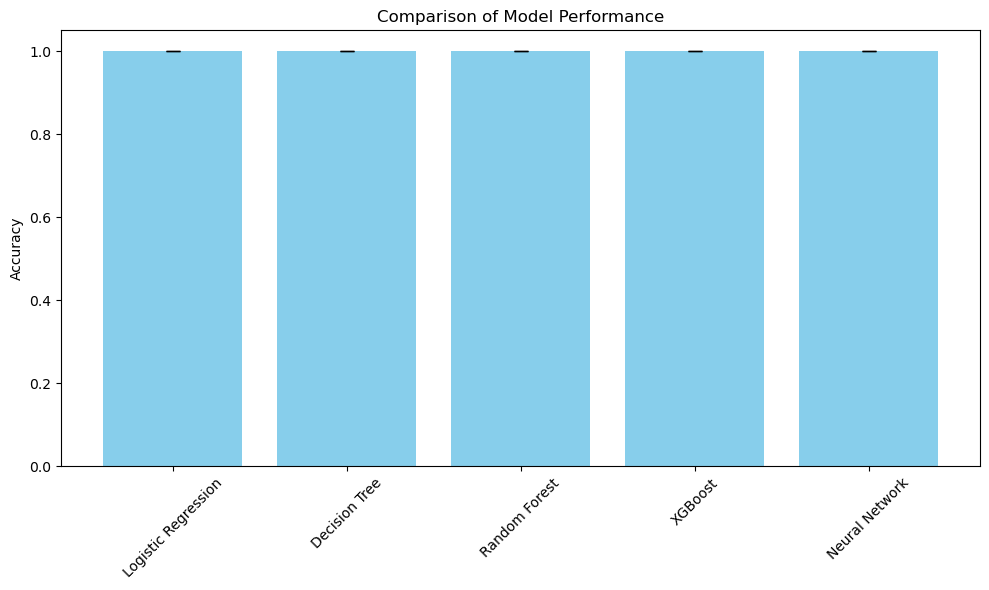

In [52]:
model_names = list(model_scores.keys())
model_means = [score[0] for score in model_scores.values()]
model_stds = [score[1] for score in model_scores.values()]

plt.figure(figsize=(10, 6))
plt.bar(model_names, model_means, yerr=model_stds, capsize=5, color='skyblue')
plt.ylabel('Accuracy')
plt.title('Comparison of Model Performance')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()